1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
np.random.seed(1995)

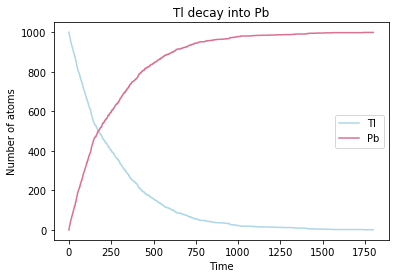

In [2]:
N=1000
tau=3.052*60 


N_Tl = [N]
N_Pb = [0]
test = np.random.uniform(0,1,1000)
Tl = N
Pb = 0

def p(t):
    tau=3.052*60 
    return 1 - 2**(-(t)/tau)

for t in range(1,1800):
    for i in range(0,len(test)):
        if i >= len(test):
            break
        else:
            if ((test[i] < p(t)) and (N_Tl[-1] > 0)):
                test=np.delete(test,[i])
                Pb += 1
                Tl -= 1
    N_Tl.append(Tl)
    N_Pb.append(Pb)

plt.plot(N_Tl, color="lightblue", label="Tl")
plt.plot(N_Pb, color="palevioletred", label="Pb")
plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.title("Tl decay into Pb")
plt.legend()

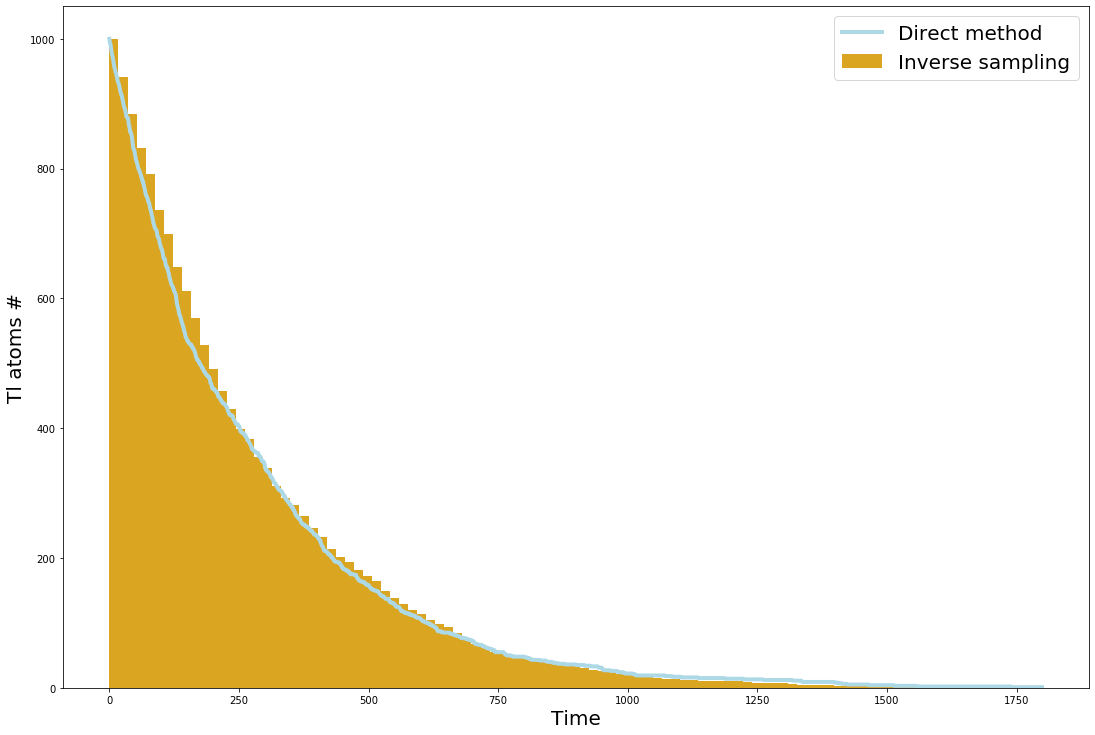

In [3]:
def inverse_p(u):
    return -np.log(1 - u)*tau/(np.log(2))

u = np.random.uniform(0,1,1000)
pi = inverse_p(u)
fig,ax = plt.subplots(1,1,figsize=(15,10))
b, e, p = ax.hist(pi, cumulative=-1, bins=100, color="goldenrod", label="Inverse sampling")
#cumulative -1 computes cumulative distribution reversing it(so that p > 0 = 1)
ax.plot(np.arange(0,1800),N_Tl, linewidth=4, color="lightblue", label="Direct method")
fig.tight_layout()
ax.set_ylabel("Tl atoms #", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.legend(loc="best",fontsize=20)

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
N = 10**6
Z = 79
e_minus=1.602176565*10**(-19)
E=7.7*10**(6)*e_minus
alpha=5.2917721067*10**(-11)
e0=8.8541878176*10**(-12)

Percentage of beam bounching back: 0.149%


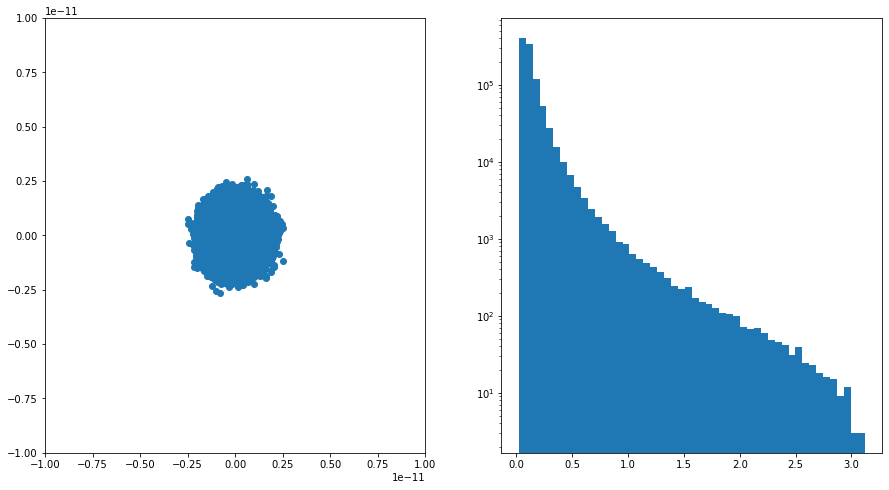

In [5]:
beam_x, beam_y = np.random.normal(0, alpha/100, N), np.random.normal(0, alpha/100, N)
#beam_x, beam_y = np.random.multivariate_normal((0,0),[[alpha/100,0],[0, alpha/100]], N).T

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,8))

ax0.scatter(beam_x, beam_y)
ax0.set_ylim(-10**(-11),10**(-11))
ax0.set_xlim(-10**(-11),10**(-11))


#b = np.sqrt(beam_x*beam_x + beam_y*beam_y)
b=np.sqrt((beam_x)**2+(beam_y)**2)

theta = 2*np.arctan((Z*e_minus*e_minus)/(2*np.pi*e0*E*b))

b, e, p = ax1.hist(theta,bins=50)
ax1.set_yscale("log")

bounce_percentage = len(theta[theta > np.pi/2])/len(theta)
print("Percentage of beam bounching back: {:.3%}" .format(bounce_percentage))

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

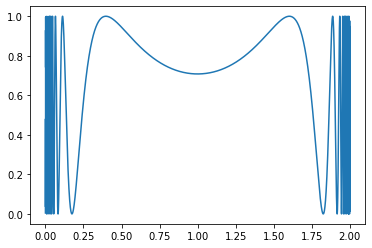

In [6]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x = np.linspace(0.000001,1.99999,10000)

plt.plot(x,f(x))

In [7]:
#hit or miss
N=100000
area = 2
rand_x = np.random.uniform(0,2,N)
rand_y = np.random.uniform(0,1,N)
hit = 0
for i in range(N):
    if (rand_y[i] < f(rand_x[i])):
        hit +=1

area_hit_or_miss = area*hit/N         
err = area*np.sqrt((hit/N)*(1-hit/N)/N)
print("Area via Hir or Miss:{:.4}" .format(area_hit_or_miss), "\u00B1 {:.2}" .format(err))

#mean value
area_mean_value = area*np.sum(f(x))/len(x)
err1 = area*np.std(f(x))/np.sqrt(len(x))
print("Area via mean value:{:.4}" .format(area_mean_value) , "\u00B1 {:.2}" .format(err1))



Area via Hir or Miss:1.446 ± 0.0028
Area via mean value:1.451 ± 0.0053


The value of the hit or miss doesn't improve that much if we change N from N=10^3 to N=10^6 whereas if we compute f on 10^3 vs 10^6 points the mean value integral gets better (although the error increases)

Reference for the formula used for the hit or miss error:
https://ifisc.uib-csic.es/raul/CURSOS/Stochastic_Simulation_Methods/SLIDES/2.-Sampling%20methods.pdf

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [8]:
N=10**5

def sphere(point,radius=1):
    if np.sum(point**2) <= radius*radius:
        return 1
    else:
        return 0
a,b=-1,1
points = pd.DataFrame({"x1":np.random.uniform(a,b,N), "x2":np.random.uniform(a,b,N)})

hit_frac=points.apply(sphere,axis=1).sum()/N
integral = (b-a)**2*hit_frac
err = (b-a)**2*np.sqrt((hit_frac)*(1-hit_frac)/N)


print("2d integral: {:.4}" .format(integral), "\u00B1 {:.1}" .format(err))

2d integral: 3.139 ± 0.005


In [9]:
N_dim = 10

ND_points = pd.DataFrame()
for i in range(N_dim):
    name="x"+str(i)
    ND_points[name]=np.random.uniform(a,b,N)
ND_points.head()

hit_frac_ND=(ND_points.apply(sphere,axis=1).sum())/N
integral_ND = ((b-a)**N_dim)*hit_frac_ND
err_ND = ((b-a)**N_dim)*np.sqrt((hit_frac_ND)*(1-hit_frac_ND)/N)


print("10D integral: {:.4}" .format(integral_ND), "\u00B1 {:.3}" .format(err_ND))

print("Actual value:", math.pi**(N_dim/2)/math.gamma(N_dim/2 + 1))

10D integral: 2.468 ± 0.159
Actual value: 2.550164039877345


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [10]:
N=10**5
x = np.linspace(0.000001,1,N)

def f(x):
    return x**(-1/2)/(np.exp(x)+1)
def g(x):
    return x**(-1/2)

x_temp = pd.DataFrame(x)
int_g = float(x_temp.apply(g).mean())    #integral of the importance samplng function between 0 and 1 (via mean value)

def importance_sampling(x, int_g):
    return(np.mean(f(x)/g(x))*int_g)

integral = importance_sampling(x, int_g)
print("Integral via importance sampling:", integral)

Integral via importance sampling: 0.7616591740018875
